# **1. DATA FETCHING**

In [237]:
# Import necessary libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

# Visualization setup
sns.set(style="whitegrid")

In [238]:
QUIZ_DATA_URL = "https://www.jsonkeeper.com/b/LLQT"
QUIZ_SUBMISSION_DATA_URL = "https://api.jsonserve.com/rJvd7g"
HISTORICAL_DATA_URL = "https://api.jsonserve.com/XgAgFJ"

# Fetch data from APIs
quiz_data = requests.get(QUIZ_DATA_URL).json()
quiz_submission_data = requests.get(QUIZ_SUBMISSION_DATA_URL).json()
response_map = quiz_submission_data["response_map"]

# Convert quiz data to DataFrame for easier handling
quiz_df = pd.json_normalize(
    quiz_data["quiz"],
    record_path=["questions"],
    meta=["id", "title", "topic"],
    meta_prefix="quiz_",  # Prefix metadata to avoid conflicts
    record_prefix="question_"  # Prefix record fields for clarity
)
historical_data = requests.get(HISTORICAL_DATA_URL).json()


# Convert to DataFrames for easier analysis
submission_df = pd.DataFrame([quiz_submission_data])

# Check if historical_data is a list before creating the DataFrame
if isinstance(historical_data, list):
    historical_df = pd.DataFrame(historical_data)
else:
    # Handle the case where it's not a list (e.g., an error response)
    print("Historical data is not in the expected list format.")
    historical_df = pd.DataFrame()  # Create an empty DataFrame or handle the error appropriately

# **2. DATA EXPLORATION**

In [239]:
quiz_df.head()

,question_id,question_description,question_difficulty_level,question_topic,question_is_published,question_created_at,question_updated_at,question_detailed_solution,question_type,question_is_mandatory,...,question_question_from,question_language,question_photo_url,question_photo_solution_url,question_is_saved,question_tag,question_options,quiz_id,quiz_title,quiz_topic
0,1827,The tissue which has free surface that faces e...,None,structural organisation in animals,True,2024-07-02T12:43:34.360+05:30,2024-11-30T18:39:20.587+05:30,**Explanation:**\n\nThe tissue that has a free...,,False,...,Q-bank,None,None,None,False,,"[{'id': 7321, 'description': 'Muscular tissue'...",43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals
1,1828,Epithelial tissue is distinguished from connec...,None,structural organisation in animals,True,2024-07-02T12:50:56.100+05:30,2024-11-30T18:39:20.788+05:30,**Epithelial Tissue**\n\n* Epithelial tissue i...,,False,...,Q-bank,None,None,None,False,,"[{'id': 7325, 'description': 'large extracellu...",43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals
2,1829,The ciliated columnar epithelial cells in huma...,None,structural organisation in animals,True,2024-07-02T12:54:25.824+05:30,2024-11-30T18:39:20.990+05:30,**Explanation:**\n\nCiliated columnar epitheli...,,False,...,Q-bank,None,None,None,False,,"[{'id': 7329, 'description': 'Eustachian tube ...",43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals
3,1830,The squamous epithelium is found in,None,structural organisation in animals,True,2024-07-02T12:56:48.204+05:30,2024-11-30T18:39:21.192+05:30,**Explanation:**\n\nSquamous epithelium is a t...,,False,...,Q-bank,None,None,None,False,,"[{'id': 7333, 'description': 'stomach', 'quest...",43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals
4,1831,The kind of epithelium which forms the inner w...,None,structural organisation in animals,True,2024-07-02T12:58:51.241+05:30,2024-11-30T18:39:21.398+05:30,**Answer is correct because:**\n\nSquamous epi...,,False,...,Q-bank,None,None,None,False,,"[{'id': 7337, 'description': 'cuboidal epithel...",43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals


In [240]:
submission_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}]


In [241]:
historical_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [242]:
print('--quiz_df--')
print(quiz_df.info())
print('\n--submission_df--')
print(submission_df.info())
print('\n--historical_df--')
print(historical_df.info())

--quiz_df--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   question_id                   128 non-null    int64 
 1   question_description          128 non-null    object
 2   question_difficulty_level     0 non-null      object
 3   question_topic                128 non-null    object
 4   question_is_published         128 non-null    bool  
 5   question_created_at           128 non-null    object
 6   question_updated_at           128 non-null    object
 7   question_detailed_solution    119 non-null    object
 8   question_type                 63 non-null     object
 9   question_is_mandatory         128 non-null    bool  
 10  question_show_in_feed         128 non-null    bool  
 11  question_pyq_label            5 non-null      object
 12  question_topic_id             128 non-null    int64 
 13  question

## Generate Correct Answer DataFrame for all the question

In [243]:
correct_answers = []

for index, row in quiz_df.iterrows():

    options = row['question_options']

    # Find the correct answer from the options
    correct_option = [option for option in options if option['is_correct']]

    # Append the question ID and the correct answer to the list
    if correct_option:
        correct_answers.append({'question_id': row['question_id'], 'correct_answer': correct_option[0]['id']})

# Create a new dataframe from the list of correct answers
correct_answer_df = pd.DataFrame(correct_answers)

print(correct_answer_df)
print(correct_answer_df.info())

     question_id  correct_answer
0           1827            7323
1           1828            7328
2           1829            7330
3           1830            7336
4           1831            7340
..           ...             ...
123         1960            7857
124         1961            7858
125         1962            7865
126         1963            7868
127         1964            7872

[128 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   question_id     128 non-null    int64
 1   correct_answer  128 non-null    int64
dtypes: int64(2)
memory usage: 2.1 KB
None


# **3. Merge the Datasets**

In [244]:
# Check if response_map is a string and parse it if necessary
if isinstance(submission_df['response_map'].iloc[0], str):
    submission_df['response_map'] = submission_df['response_map'].apply(json.loads)

In [245]:
# Create a new DataFrame to hold the response data
response_data = []

In [246]:
# Iterate through the response_map to extract question_id and selected_option
for index, row in submission_df.iterrows():
    response_map = row['response_map']
    for question_id, selected_option in response_map.items():
        response_data.append({
            'user_id': row['user_id'],
            'quiz_id': row['quiz_id'],
            'question_id': int(question_id),  # Convert question_id to int
            'selected_option': selected_option
        })

In [247]:
# Convert the response data to a DataFrame
response_df = pd.DataFrame(response_data)

In [248]:
# Ensure question_id in quiz_df is also of type int
quiz_df['question_id'] = quiz_df['question_id'].astype(int)

In [249]:
# Merge with quiz_df to get correct answers
response_merged = response_df.merge(quiz_df[['question_id', 'question_options']], on='question_id', how='left')

In [250]:
# Extract correct answers from question_options
def get_correct_answer(row):
    options = row['question_options']
    for option in options:
        if option.get('is_correct', False):
            return option['id']
    return None

In [251]:
# Apply the function to get correct answers
response_merged['correct_answer'] = response_merged.apply(get_correct_answer, axis=1)

In [252]:
# Now we have a DataFrame with selected answers and correct answers
print("Response Merged DataFrame:")
print(response_merged[['question_id', 'selected_option', 'correct_answer']].head())

Response Merged DataFrame:
   question_id  selected_option  correct_answer
0         1837             7363            7363
1         1848             7407            7407
2         1852             7423            7423
3         1862             7464            7462
4         1877             7525            7525


In [253]:
# Check for any missing values in the merged DataFrame
print("Missing values in response_merged:")
print(response_merged.isnull().sum())

Missing values in response_merged:
user_id             0
quiz_id             0
question_id         0
selected_option     0
question_options    0
correct_answer      0
dtype: int64


# **4. ANALYSIS OF CURRENT SUBMISSION**

In [254]:
# Calculate whether the selected option is correct
response_merged['is_correct'] = response_merged['selected_option'] == response_merged['correct_answer']

# Calculate accuracy
accuracy = response_merged['is_correct'].mean() * 100
print(f"Overall Accuracy: {accuracy:.2f}%")


Overall Accuracy: 80.00%


In [255]:
# Group by question topic to analyze performance
# Assuming 'question_topic' is a column in quiz_df
response_merged = response_merged.merge(quiz_df[['question_id', 'question_topic']], on='question_id', how='left')

# Now group by question_topic
topic_performance = response_merged.groupby('question_topic').agg(
    total_questions=('is_correct', 'count'),
    correct_answers=('is_correct', 'sum')
).reset_index()

# Calculate accuracy per topic
topic_performance['accuracy'] = (topic_performance['correct_answers'] / topic_performance['total_questions']) * 100

# Print topic performance
print("Topic Performance:")
print(topic_performance[['question_topic', 'total_questions', 'correct_answers', 'accuracy']])


Topic Performance:
                        question_topic  total_questions  correct_answers  \
0  structural organisation in animals                10                8   

   accuracy  
0      80.0  


<ipython-input-256-012f53f2e9dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_performance, x='question_topic', y='accuracy', palette='viridis')


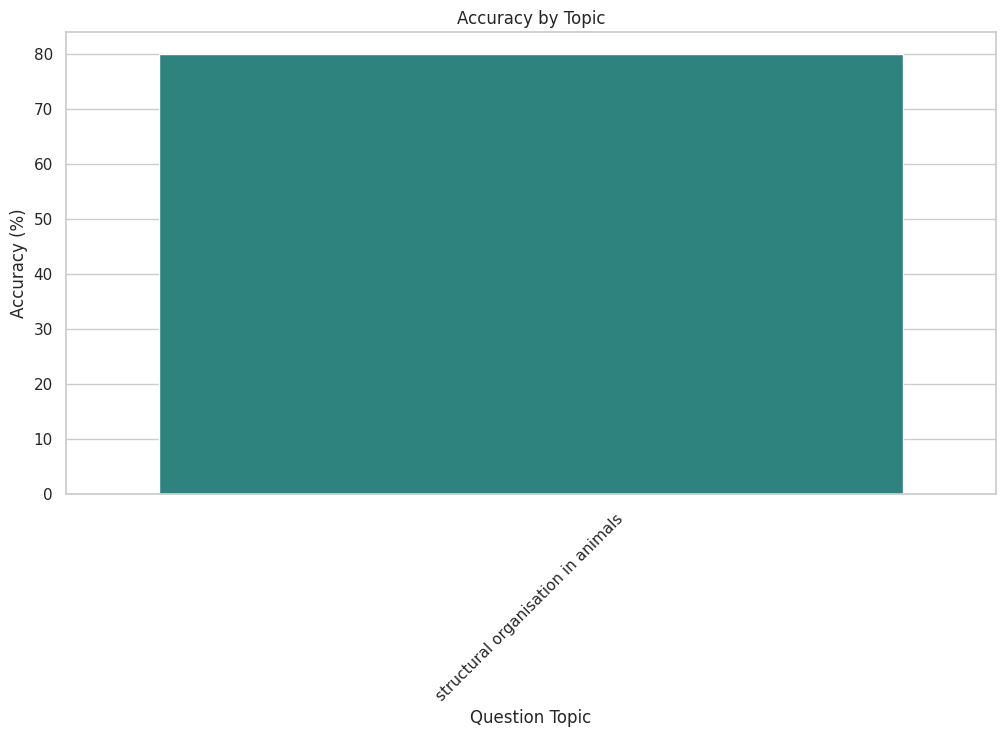

In [256]:
plt.figure(figsize=(12, 6))
sns.barplot(data=topic_performance, x='question_topic', y='accuracy', palette='viridis')
plt.title('Accuracy by Topic')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')
plt.xlabel('Question Topic')
plt.show()

# **5. TOPICWISE ANALYSIS FOR INSIGHTS**

In [257]:
def analyze_historical_performance(historical_df):
    # Group historical data by topic and aggregate correct/incorrect answers
    topic_performance = historical_df.groupby(
        historical_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) else 'Unknown')
    ).agg({
        'correct_answers': 'sum',
        'incorrect_answers': 'sum'
    }).reset_index()

    # Calculate accuracy percentage
    topic_performance['accuracy'] = (
        topic_performance['correct_answers'] /
        (topic_performance['correct_answers'] + topic_performance['incorrect_answers'])
        * 100
    ).round(2)

    # Visualization
    plt.figure(figsize=(12, 6))

    # Prepare data for plotting
    topics = topic_performance['quiz']
    correct = topic_performance['correct_answers']
    incorrect = topic_performance['incorrect_answers']

    # Create stacked bar plot
    plt.bar(topics, correct, label='Correct Answers', color='green')
    plt.bar(topics, incorrect, bottom=correct, label='Incorrect Answers', color='red')

    plt.title('Historical Quiz Performance by Topic')
    plt.xlabel('Topic')
    plt.ylabel('Number of Questions')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Add accuracy percentages on top of each bar
    for i, (topic, acc) in enumerate(zip(topics, topic_performance['accuracy'])):
        plt.text(i, correct[i] + incorrect[i], f'{acc}%',
                 ha='center', va='bottom')

    plt.show()

    return topic_performance



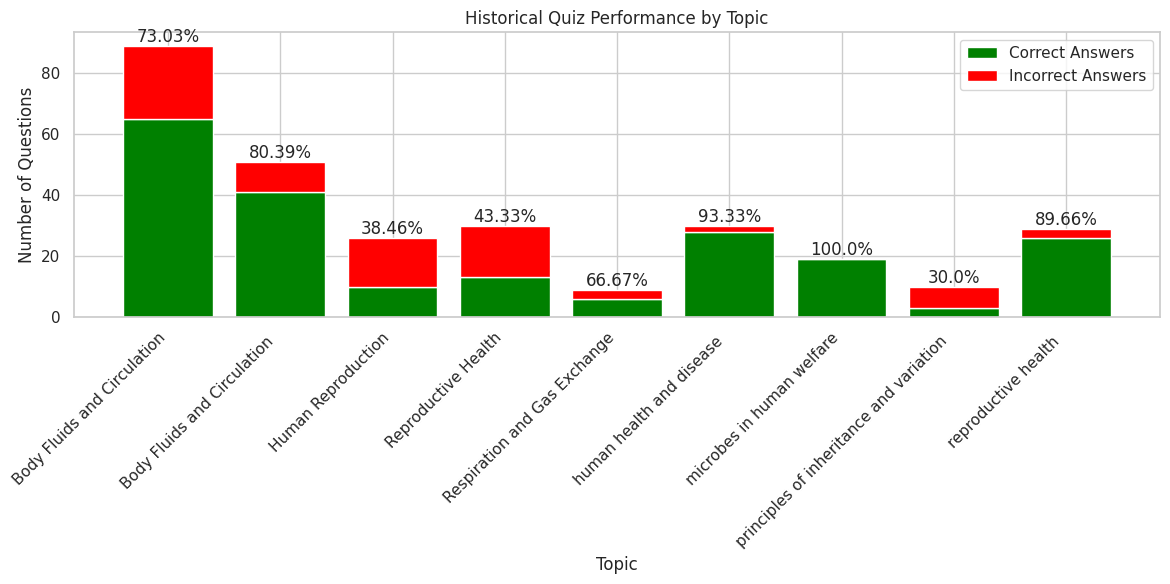


Topic Performance:


,quiz,correct_answers,incorrect_answers,accuracy
0,Body Fluids and Circulation,65,24,73.03
1,Body Fluids and Circulation,41,10,80.39
2,Human Reproduction,10,16,38.46
3,Reproductive Health,13,17,43.33
4,Respiration and Gas Exchange,6,3,66.67
5,human health and disease,28,2,93.33
6,microbes in human welfare,19,0,100.00
7,principles of inheritance and variation,3,7,30.00
8,reproductive health,26,3,89.66


In [267]:
# Run the analysis
topic_performance = analyze_historical_performance(historical_df)

print("\nTopic Performance:")
topic_performance

# **6. TOPIC WISE RECOMMENDATIONS**

In [259]:
# Generate recommendations based on topic performance
def generate_topic_recommendations(topic_performance):
    # Sort topics by lowest accuracy
    sorted_topics = topic_performance.sort_values('accuracy')

    recommendations = []
    for _, row in sorted_topics.iterrows():
        if row['accuracy'] < 50:
            recommendation = f"Urgent Focus Needed: {row['quiz']} (Accuracy: {row['accuracy']}%)"
        elif row['accuracy'] < 70:
            recommendation = f"Improvement Area: {row['quiz']} (Accuracy: {row['accuracy']}%)"
        else:
            recommendation = f"Solid Performance: {row['quiz']} (Accuracy: {row['accuracy']}%)"
        recommendations.append(recommendation)

    return recommendations



In [260]:
recommendations = generate_topic_recommendations(topic_performance)
print("\nRecommendations:")
for rec in recommendations:
    print(rec)


Recommendations:
Urgent Focus Needed: principles of inheritance and variation  (Accuracy: 30.0%)
Urgent Focus Needed: Human Reproduction (Accuracy: 38.46%)
Urgent Focus Needed: Reproductive Health (Accuracy: 43.33%)
Improvement Area: Respiration and Gas Exchange (Accuracy: 66.67%)
Solid Performance: Body Fluids and Circulation (Accuracy: 73.03%)
Solid Performance: Body Fluids and Circulation  (Accuracy: 80.39%)
Solid Performance: reproductive health  (Accuracy: 89.66%)
Solid Performance: human health and disease  (Accuracy: 93.33%)
Solid Performance: microbes in human welfare (Accuracy: 100.0%)


# **7. STUDENT PERSONA**

In [261]:
def generate_student_persona(historical_df, current_submission_df):
    # Performance Metrics
    total_quizzes = int(len(historical_df))
    avg_score = float(historical_df['score'].mean())
    max_score = float(historical_df['score'].max())
    min_score = float(historical_df['score'].min())

    # Performance Consistency
    score_std = float(historical_df['score'].std())
    performance_consistency = 'Stable' if score_std < 10 else 'Variable'

    # Speed and Accuracy Analysis
    avg_accuracy = float(historical_df['accuracy'].str.rstrip('%').astype(float).mean())
    speed_ratings = historical_df['speed'].astype(float)
    avg_speed = float(speed_ratings.mean())

    # Learning Trajectory
    recent_performance = historical_df.sort_values('submitted_at', ascending=False).head(3)
    performance_trend = (
        'Improving' if recent_performance['score'].is_monotonic_increasing else
        'Declining' if recent_performance['score'].is_monotonic_decreasing else
        'Fluctuating'
    )

    # Mistakes and Learning
    total_mistakes_corrected = int(historical_df['mistakes_corrected'].sum())
    initial_mistake_count = float(historical_df['initial_mistake_count'].mean())

    # Topic Diversity
    topics = historical_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) else 'Unknown')
    unique_topics = int(topics.nunique())

    # Trophy and Achievement Level
    trophy_levels = historical_df['trophy_level']
    highest_trophy = int(trophy_levels.max())

    # Current Quiz Performance
    current_quiz_score = float(current_submission_df['score'].iloc[0]) if not current_submission_df.empty else None

    # Persona Classification
    def classify_persona():
        if avg_accuracy > 85 and performance_trend == 'Improving':
            return "High-Potential Learner"
        elif avg_accuracy > 75 and total_mistakes_corrected > 0:
            return "Dedicated Improver"
        elif avg_accuracy > 60 and performance_trend == 'Fluctuating':
            return "Inconsistent Performer"
        elif avg_accuracy < 50:
            return "Struggling Learner"
        else:
            return "Steady Learner"

    # Generate Detailed Persona Report
    persona_report = {
        "Performance Profile": {
            "Total Quizzes Attempted": total_quizzes,
            "Average Score": f"{avg_score:.2f}",
            "Highest Score": max_score,
            "Lowest Score": min_score,
            "Performance Consistency": performance_consistency,
            "Performance Trend": performance_trend
        },
        "Learning Characteristics": {
            "Average Accuracy": f"{avg_accuracy:.2f}%",
            "Average Speed": f"{avg_speed:.2f}",
            "Topics Explored": unique_topics,
            "Total Mistakes Corrected": total_mistakes_corrected,
            "Average Initial Mistakes": f"{initial_mistake_count:.2f}"
        },
        "Achievement Metrics": {
            "Highest Trophy Level": highest_trophy,
            "Current Quiz Score": current_quiz_score
        },
        "Persona Classification": classify_persona()
    }

    return persona_report



In [262]:
student_persona = generate_student_persona(historical_df, submission_df)

# Print the persona report
print(json.dumps(student_persona, indent=2))

{
  "Performance Profile": {
    "Total Quizzes Attempted": 14,
    "Average Score": "60.29",
    "Highest Score": 116.0,
    "Lowest Score": 12.0,
    "Performance Consistency": "Variable",
    "Performance Trend": "Fluctuating"
  },
  "Learning Characteristics": {
    "Average Accuracy": "72.21%",
    "Average Speed": "95.07",
    "Topics Explored": 9,
    "Total Mistakes Corrected": 40,
    "Average Initial Mistakes": "8.71"
  },
  "Achievement Metrics": {
    "Highest Trophy Level": 3,
    "Current Quiz Score": 32.0
  },
  "Persona Classification": "Inconsistent Performer"
}


## Visualization of Persona

In [263]:
def visualize_student_persona(persona_report):
    # Set up the plot
    plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # 1. Performance Radar Chart
    plt.subplot(2, 3, 1)
    performance_metrics = [
        float(persona_report['Performance Profile']['Average Score']),
        float(persona_report['Learning Characteristics']['Average Accuracy'].rstrip('%')),
        persona_report['Learning Characteristics']['Topics Explored'],
        persona_report['Achievement Metrics']['Highest Trophy Level']
    ]
    categories = ['Score', 'Accuracy', 'Topics', 'Trophy Level']

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    values = np.concatenate((performance_metrics, [performance_metrics[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    plt.polar(angles, values, 'o-', linewidth=2)
    plt.fill(angles, values, alpha=0.25)
    plt.xticks(angles[:-1], categories)
    plt.title('Performance Radar')

    # 2. Learning Characteristics Bar Chart
    plt.subplot(2, 3, 2)
    learning_data = {
        'Avg Speed': float(persona_report['Learning Characteristics']['Average Speed']),
        'Mistakes Corrected': persona_report['Learning Characteristics']['Total Mistakes Corrected'],
        'Initial Mistakes': float(persona_report['Learning Characteristics']['Average Initial Mistakes'])
    }

    plt.bar(learning_data.keys(), learning_data.values())
    plt.title('Learning Characteristics')
    plt.xticks(rotation=45)
    plt.ylabel('Value')

    # 3. Persona Classification Pie Chart
    plt.subplot(2, 3, 3)
    persona_classification = persona_report['Persona Classification']
    performance_trend = persona_report['Performance Profile']['Performance Trend']

    plt.pie([1], labels=[persona_classification], autopct='%1.1f%%',
            colors=['#ff9999'], startangle=90)
    plt.title(f'Persona: {performance_trend}')

    # 4. Score Distribution Box Plot
    plt.subplot(2, 3, 4)
    score_data = [
        float(persona_report['Performance Profile']['Lowest Score']),
        float(persona_report['Performance Profile']['Average Score']),
        float(persona_report['Performance Profile']['Highest Score'])
    ]
    plt.boxplot(score_data, labels=['Score Range'])
    plt.title('Score Distribution')
    plt.ylabel('Score')

    # 5. Achievement Metrics
    plt.subplot(2, 3, 5)
    achievement_data = {
        'Total Quizzes': persona_report['Performance Profile']['Total Quizzes Attempted'],
        'Trophy Level': persona_report['Achievement Metrics']['Highest Trophy Level']
    }
    plt.bar(achievement_data.keys(), achievement_data.values())
    plt.title('Achievement Metrics')
    plt.ylabel('Count')

    # 6. Performance Trend
    plt.subplot(2, 3, 6)
    plt.text(0.5, 0.5, persona_report['Performance Profile']['Performance Trend'],
             horizontalalignment='center', verticalalignment='center', fontsize=15)
    plt.title('Performance Trend')
    plt.axis('off')

    plt.suptitle(f"Student Persona: {persona_report['Persona Classification']}", fontsize=16)
    plt.tight_layout()
    plt.show()



<ipython-input-263-8d7ebc13bf94>:20: MatplotlibDeprecationWarning: There exists a non-polar current Axes. Therefore, the resulting plot from 'polar()' is non-polar. You likely should call 'polar()' before any other pyplot plotting commands. Support for this scenario is deprecated in 3.10 and will raise an error in 3.12
  plt.polar(angles, values, 'o-', linewidth=2)
<ipython-input-263-8d7ebc13bf94>:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(score_data, labels=['Score Range'])


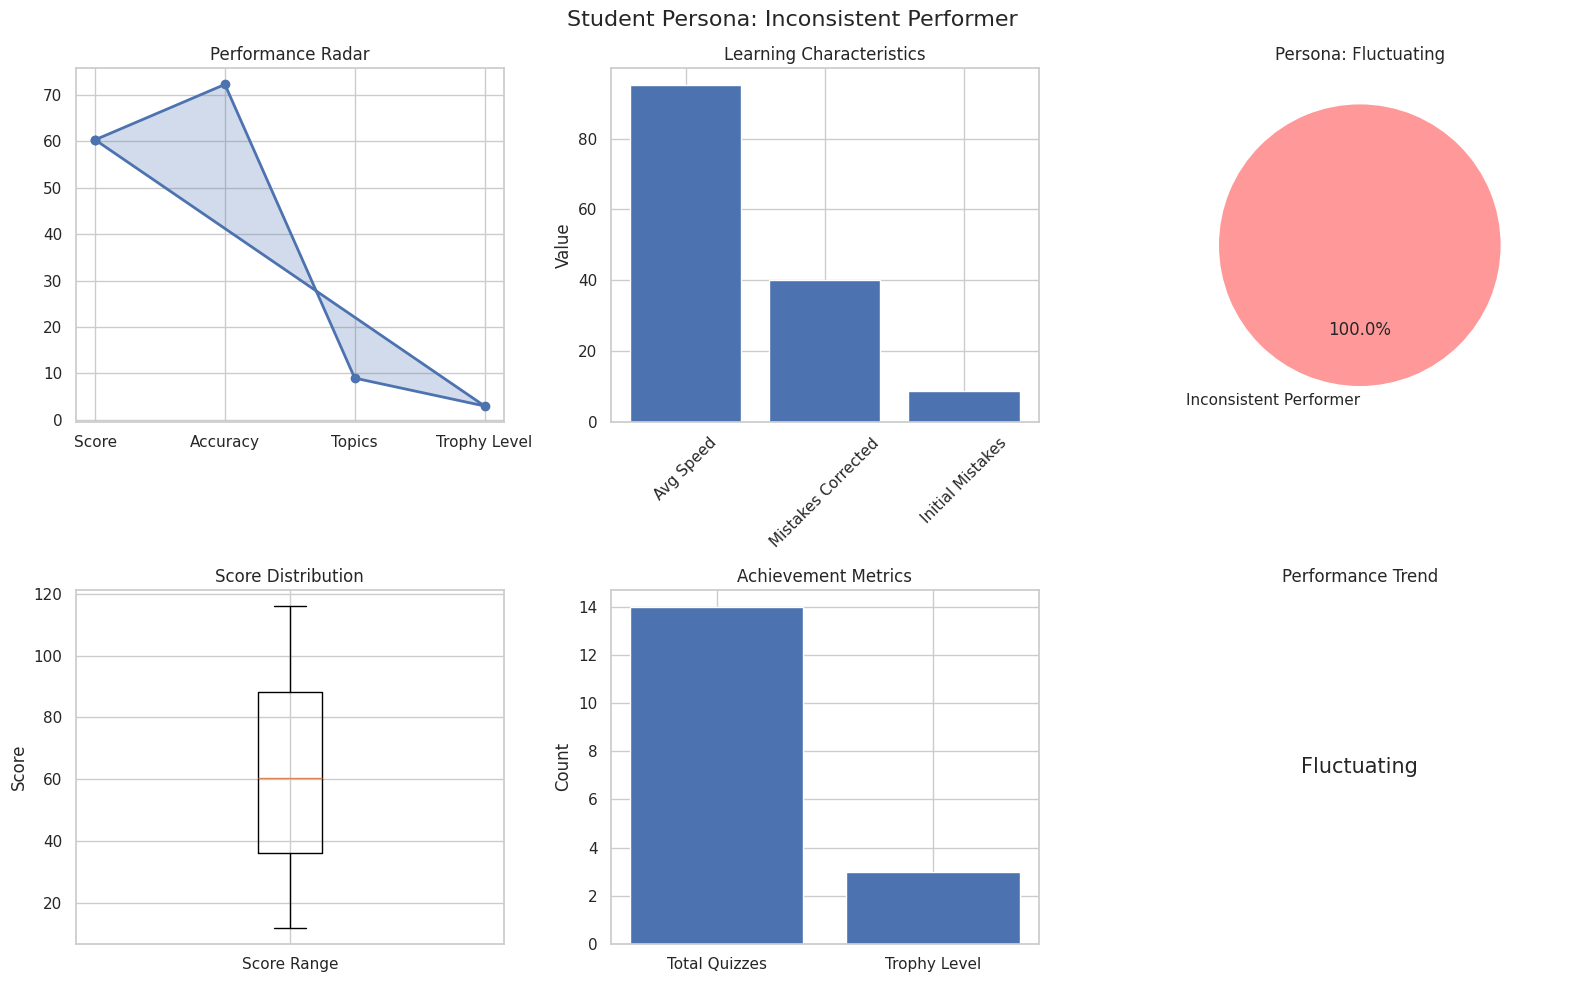

In [264]:
visualize_student_persona(student_persona)

## **8. PERFORMANCE INSIGHTS**

In [265]:
def generate_performance_insights(historical_df, quiz_df):
    # Identify performance by topic
    topic_performance = historical_df.groupby(
        historical_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) else 'Unknown')
    ).agg({
        'correct_answers': 'sum',
        'incorrect_answers': 'sum'
    }).reset_index()

    topic_performance['accuracy'] = (
        topic_performance['correct_answers'] /
        (topic_performance['correct_answers'] + topic_performance['incorrect_answers'])
        * 100
    ).round(2)

    # Creative Strength Labels
    def get_topic_strength_label(accuracy):
        if accuracy > 85: return "🏆 Mastery Zone"
        elif accuracy > 70: return "🚀 Emerging Expert"
        elif accuracy > 50: return "🔍 Growing Potential"
        else: return "🚧 Needs Attention"

    # Creative Weakness Labels
    def get_topic_weakness_label(accuracy):
        if accuracy < 30: return "⚠️ Critical Skill Gap"
        elif accuracy < 50: return "🛠️ Skill Reconstruction Needed"
        elif accuracy < 70: return "🧩 Incomplete Understanding"
        else: return "🌱 Minor Refinement Required"

    # Insights Generation
    topic_insights = []
    for _, row in topic_performance.iterrows():
        topic = row['quiz']
        accuracy = row['accuracy']

        # Detailed Topic Insight
        if accuracy > 70:
            strength_insight = {
                'topic': topic,
                'label': get_topic_strength_label(accuracy),
                'description': f"A strong performer in {topic}, demonstrating consistent understanding and application of key concepts.",
                'improvement_potential': "Focus on advanced problem-solving and deeper conceptual exploration."
            }
            topic_insights.append(strength_insight)
        else:
            weakness_insight = {
                'topic': topic,
                'label': get_topic_weakness_label(accuracy),
                'description': f"Identified areas requiring targeted learning intervention in {topic}.",
                'recommended_actions': [
                    "Revisit fundamental concepts",
                    "Practice targeted problem sets",
                    "Seek additional explanatory resources"
                ]
            }
            topic_insights.append(weakness_insight)

    # Overall Performance Persona
    total_accuracy = topic_performance['accuracy'].mean()

    def generate_overall_persona():
        if total_accuracy > 80:
            return "🌟 Strategic Learner: Systematically conquering academic challenges"
        elif total_accuracy > 60:
            return "🔬 Analytical Improver: Methodically building knowledge foundations"
        else:
            return "🛤️ Potential Accelerator: Requires structured guidance and support"

    return {
        'topic_insights': topic_insights,
        'overall_persona': generate_overall_persona(),
        'total_performance_accuracy': total_accuracy
    }


In [266]:
performance_insights = generate_performance_insights(historical_df, quiz_df)

# Print Insights
print("Topic-wise Insights:")
for insight in performance_insights['topic_insights']:
    print(f"\nTopic: {insight['topic']}")
    print(f"Label: {insight.get('label', 'N/A')}")
    print(f"Description: {insight.get('description', 'N/A')}")

    if 'improvement_potential' in insight:
        print(f"Improvement Potential: {insight['improvement_potential']}")

    if 'recommended_actions' in insight:
        print("Recommended Actions:")
        for action in insight['recommended_actions']:
            print(f"- {action}")

print(f"\nOverall Persona: {performance_insights['overall_persona']}")
print(f"Total Performance Accuracy: {performance_insights['total_performance_accuracy']:.2f}%")

Topic-wise Insights:

Topic: Body Fluids and Circulation
Label: 🚀 Emerging Expert
Description: A strong performer in Body Fluids and Circulation, demonstrating consistent understanding and application of key concepts.
Improvement Potential: Focus on advanced problem-solving and deeper conceptual exploration.

Topic: Body Fluids and Circulation 
Label: 🚀 Emerging Expert
Description: A strong performer in Body Fluids and Circulation , demonstrating consistent understanding and application of key concepts.
Improvement Potential: Focus on advanced problem-solving and deeper conceptual exploration.

Topic: Human Reproduction
Label: 🛠️ Skill Reconstruction Needed
Description: Identified areas requiring targeted learning intervention in Human Reproduction.
Recommended Actions:
- Revisit fundamental concepts
- Practice targeted problem sets
- Seek additional explanatory resources

Topic: Reproductive Health
Label: 🛠️ Skill Reconstruction Needed
Description: Identified areas requiring targeted 